### 1.1 Reading and Plotting Stock Data

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

#### Read CSV

In [81]:
def run():
    df = pd.read_csv("../ML4TData/data/APPL.csv")
    print df.head()
    print df.tail()
    
if __name__ == "__main__":
    run()

         Date        Open        High         Low       Close    Volume  \
0  2016-08-11  108.519997  108.930000  107.849998  107.930000  24427700   
1  2016-08-10  108.709999  108.900002  107.760002  108.000000  24008500   
2  2016-08-09  108.230003  108.940002  108.010002  108.809998  26315200   
3  2016-08-08  107.519997  108.370003  107.160004  108.370003  28037200   
4  2016-08-05  106.269997  107.650002  106.180000  107.480003  40553400   

    Adj Close  
0  107.930000  
1  108.000000  
2  108.809998  
3  108.370003  
4  107.480003  
            Date       Open       High     Low   Close     Volume  Adj Close
8989  1980-12-18  26.625000  26.750000  26.625  26.625   18362400   0.397323
8990  1980-12-17  25.875000  25.999999  25.875  25.875   21610400   0.386130
8991  1980-12-16  25.375000  25.375000  25.250  25.250   26432000   0.376804
8992  1980-12-15  27.375001  27.375001  27.250  27.250   43971200   0.406649
8993  1980-12-12  28.750000  28.875000  28.750  28.750  117258400   

#### compute max closing price

In [82]:
def get_max_close(symbol):
    df = pd.read_csv("../ML4TData/data/{}.csv".format(symbol))
    return df["Close"].max()

def run():
    for symbol in ["APPL", "IBM"]:
        print "Max Close"
        print symbol, get_max_close(symbol)
        
if __name__ == "__main__":
    run()

Max Close
APPL 702.100021
Max Close
IBM 209.5


#### compute mean volume

In [83]:
def get_mean_volume(symbol):
    df = pd.read_csv("../ML4TData/data/{}.csv".format(symbol))
    return df["Volume"].mean()

def run():
    for symbol in ["APPL","IBM"]:
        print "Mean Volume"
        print symbol, get_mean_volume(symbol)
        
        
if __name__ == "__main__":
    run()

Mean Volume
APPL 91273263.1199
Mean Volume
IBM 7103570.80315


#### plot high price for IBM

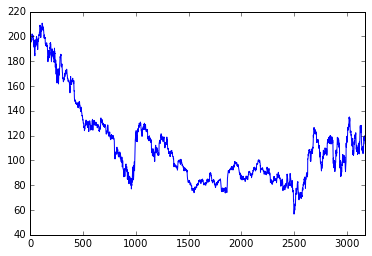

In [80]:
def run():
    df = pd.read_csv("../ML4TData/data/IBM.csv")
    df["High"].plot()
    plt.show()
    
if __name__ == "__main__":
    run()

#### plot two columns

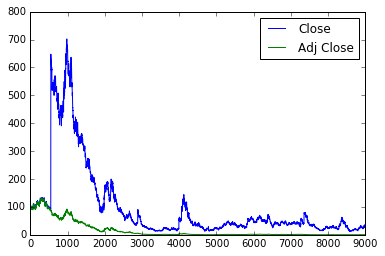

In [84]:
def run():
    df = pd.read_csv("../ML4TData/data/APPL.csv")
    df[["Close", "Adj Close"]].plot()
    plt.show()
    
if __name__ == "__main__":
    run()

### 1.2 Working with Multiple Stocks

In [55]:
import pandas as pd
import os

#### create an empty dataframe

In [85]:
def run():
    #Define date range
    start_date = "2010-01-22"
    end_date = "2010-01-26"
    dates = pd.date_range(start_date, end_date)
    #dates: DatetimeIndex class
    print dates
    for i in range(len(dates)):
        print dates[i]
    
if __name__ == "__main__":
    run()

DatetimeIndex(['2010-01-22', '2010-01-23', '2010-01-24', '2010-01-25',
               '2010-01-26'],
              dtype='datetime64[ns]', freq='D')
2010-01-22 00:00:00
2010-01-23 00:00:00
2010-01-24 00:00:00
2010-01-25 00:00:00
2010-01-26 00:00:00


In [86]:
def run():
    start_date = "2010-01-22"
    end_date = "2010-01-26"
    dates = pd.date_range(start_date, end_date)
    
    df1 = pd.DataFrame(index=dates)
    print df1
    
if __name__ == "__main__":
    run()

Empty DataFrame
Columns: []
Index: [2010-01-22 00:00:00, 2010-01-23 00:00:00, 2010-01-24 00:00:00, 2010-01-25 00:00:00, 2010-01-26 00:00:00]


#### join SPY data

In [88]:
def run():
    #Define date range
    start_date = "2010-01-22"
    end_date = "2010-01-26"
    dates = pd.date_range(start_date, end_date)
    
    #Create an empty dataframe
    df1 = pd.DataFrame(index=dates)
    
    #Read in SPY data
    dfSPY = pd.read_csv("../ML4TData/data/SPY.csv", 
                       index_col = "Date", 
                       parse_dates = True, 
                       usecols = ["Date", "Adj Close"], 
                       na_values = ["NaN"])
    #parse_dates=True let the Date be DatetimeIndex class
    print dfSPY.head()
    
    #df1 = df1.join(dfSPY, how="inner")
    print df1
    
    #OR:
    df1 = df1.join(dfSPY)
    df1 = df1.dropna()
    print df1
    
if __name__ == "__main__":
    run()

            Adj Close
Date                 
2012-09-12     144.39
2012-09-11     143.91
2012-09-10     143.51
2012-09-07     144.33
2012-09-06     143.77
Empty DataFrame
Columns: []
Index: [2010-01-22 00:00:00, 2010-01-23 00:00:00, 2010-01-24 00:00:00, 2010-01-25 00:00:00, 2010-01-26 00:00:00]
            Adj Close
2010-01-22     104.34
2010-01-25     104.87
2010-01-26     104.43


#### read in more stocks

In [90]:
def run():
    #Define the date range
    start_date = "2010-01-22"
    end_date = "2010-01-26"
    dates = pd.date_range(start_date, end_date)
    
    #create an empty dataframe
    df1 = pd.DataFrame(index = dates)
    
    #read in SPY data
    dfSPY = pd.read_csv("../ML4TData/data/SPY.csv", 
                       index_col = "Date",
                       parse_dates = True,
                       usecols = ["Date", "Adj Close"],
                       na_values = ["nan"])
    
    #rename "Adj Close" column to "SPY"
    dfSPY = dfSPY.rename(columns = {"Adj Close":"SPY"})
    
    #df1 join SPY
    df1 = df1.join(dfSPY, how="inner")
    
    #read in more stocks
    symbols = ["GOOG", "IBM", "GLD"]
    for symbol in symbols:
        df = pd.read_csv("../ML4TData/data/{}.csv".format(symbol),
                        index_col = "Date",
                        parse_dates = True,
                        usecols = ["Date", "Adj Close"],
                        na_values = ["nan"])
        
        df = df.rename(columns = {"Adj Close":symbol})
        
        df1 = df1.join(df) #use default how="left"
        
    print df1
    

if __name__ == "__main__":
    run()
    

               SPY    GOOG     IBM     GLD
2010-01-26  104.43  542.42  119.85  107.56
2010-01-25  104.87  540.00  120.20  107.48
2010-01-22  104.34  550.01  119.61  107.17


#### Utility function for reading data

In [91]:
import os
import pandas as pd

def symbol_to_path(symbol, base_dir="../ML4TData/data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """return a data frame for given symbols"""
    
    df = pd.DataFrame(index = dates)
    
    if "SPY" not in symbols:
        symbols.insert(0, "SPY")
    
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),
                             index_col = "Date",
                             parse_dates = True,
                             usecols = ["Date", "Adj Close"],
                             na_values = ["nan"])
        
        df_temp = df_temp.rename(columns = {"Adj Close":symbol})
        
        df = df.join(df_temp) #use default how="left"
        
        if symbol == "SPY":
            df = df.dropna(subset = ["SPY"])
            
    return df

def run():
    dates = pd.date_range("2010-01-22", "2010-01-26")
    
    symbols = ["GOOG", "IBM", "GLD"]
    
    df = get_data(symbols, dates)
    print df
    
if __name__ == "__main__":
    run()
        

               SPY    GOOG     IBM     GLD
2010-01-22  104.34  550.01  119.61  107.17
2010-01-25  104.87  540.00  120.20  107.48
2010-01-26  104.43  542.42  119.85  107.56


#### data frame slicing

In [92]:
import os
import pandas as pd

def symbol_to_path(symbol, base_dir="../ML4TData/data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """return a data frame for given symbols"""
    
    df = pd.DataFrame(index = dates)
    if "SPY" not in symbols:
        symbols.insert(0, "SPY")
    
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),
                             index_col = "Date",
                             parse_dates = True,
                             usecols = ["Date", "Adj Close"],
                             na_values = ["nan"])
        df_temp = df_temp.rename(columns = {"Adj Close":symbol})
        df = df.join(df_temp) #use default how="left"
        if symbol == "SPY":
            df = df.dropna(subset = ["SPY"])        
    return df

def run():
    dates = pd.date_range("2010-01-01", "2010-12-31")
    symbols = ["GOOG", "IBM", "GLD"]
    df = get_data(symbols, dates)
    
    #row slicing:
    print df.ix["2010-01-01":"2010-01-31"] #the month of Janurary
    
    #column slicing:
    print df[["GOOG"]]
    print df[["IBM","GLD"]]
    
    #row and column slicing
    print df.ix["2010-03-10":"2010-03-15",["SPY","IBM"]]
    
    
if __name__ == "__main__":
    run()

               SPY    GOOG     IBM     GLD
2010-01-04  108.27  626.75  126.24  109.80
2010-01-05  108.56  623.99  124.71  109.70
2010-01-06  108.64  608.26  123.90  111.51
2010-01-07  109.10  594.10  123.47  110.82
2010-01-08  109.46  602.02  124.71  111.37
2010-01-11  109.61  601.11  123.41  112.85
2010-01-12  108.59  590.48  124.39  110.49
2010-01-13  109.51  587.09  124.12  111.54
2010-01-14  109.80  589.85  126.10  112.03
2010-01-15  108.57  580.00  125.60  110.86
2010-01-19  109.93  587.62  127.85  111.52
2010-01-20  108.81  580.41  124.14  108.94
2010-01-21  106.72  582.98  122.95  107.37
2010-01-22  104.34  550.01  119.61  107.17
2010-01-25  104.87  540.00  120.20  107.48
2010-01-26  104.43  542.42  119.85  107.56
2010-01-27  104.93  542.10  120.40  106.53
2010-01-28  103.73  534.29  117.94  106.48
2010-01-29  102.60  529.94  116.65  105.96
              GOOG
2010-01-04  626.75
2010-01-05  623.99
2010-01-06  608.26
2010-01-07  594.10
2010-01-08  602.02
2010-01-11  601.11
2010-01

#### Plotting multiple stocks

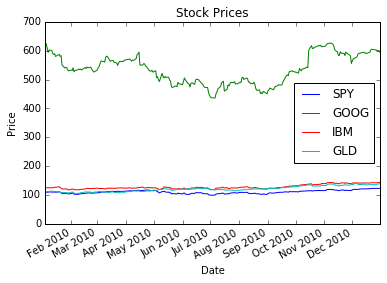

In [93]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="../ML4TData/data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """return a data frame for given symbols"""
    
    df = pd.DataFrame(index = dates)
    if "SPY" not in symbols:
        symbols.insert(0, "SPY")
    
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),
                             index_col = "Date",
                             parse_dates = True,
                             usecols = ["Date", "Adj Close"],
                             na_values = ["nan"])
        df_temp = df_temp.rename(columns = {"Adj Close":symbol})
        df = df.join(df_temp) #use default how="left"
        if symbol == "SPY":
            df = df.dropna(subset = ["SPY"])        
    return df

def plot_data(df, title="Stock Prices"):
    """plot stock prices"""
    ax = df.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

def run():
    dates = pd.date_range("2010-01-01", "2010-12-31")
    symbols = ["GOOG", "IBM", "GLD"]
    df = get_data(symbols, dates)
    
    #plot stock prices
    plot_data(df)
    
if __name__ == "__main__":
    run()

#### normalizing

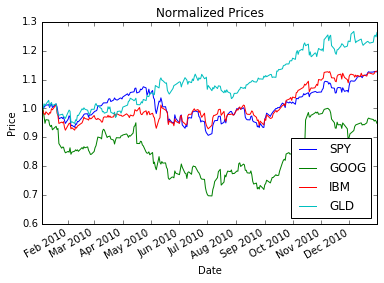

In [94]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="../ML4TData/data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """return a data frame for given symbols"""
    
    df = pd.DataFrame(index = dates)
    if "SPY" not in symbols:
        symbols.insert(0, "SPY")
    
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),
                             index_col = "Date",
                             parse_dates = True,
                             usecols = ["Date", "Adj Close"],
                             na_values = ["nan"])
        df_temp = df_temp.rename(columns = {"Adj Close":symbol})
        df = df.join(df_temp) #use default how="left"
        if symbol == "SPY":
            df = df.dropna(subset = ["SPY"])        
    return df

def plot_data(df, title="Stock Prices"):
    """plot stock prices"""
    ax = df.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
    
def normalize_data(df):
    return df / df.ix[0,:]

def run():
    dates = pd.date_range("2010-01-01", "2010-12-31")
    symbols = ["GOOG", "IBM", "GLD"]
    df = get_data(symbols, dates)
    df = normalize_data(df)
    
    #plot stock prices
    plot_data(df, title ="Normalized Prices")
    
if __name__ == "__main__":
    run()

### 1.3 Numpy

In [63]:
import numpy as np

#### creating numpy arrays

In [64]:
import numpy as np

def run():
    #1d array
    print np.array([2,3,4])
    
    #2d array
    print np.array([[2,3,4],[4,5,6]])
    
if __name__ == "__main__":
    run()

[2 3 4]
[[2 3 4]
 [4 5 6]]


#### arrays with initial values

In [74]:
def run():
    #empty array, elements are floating numbers
    print np.empty(5) #1d
    print np.empty((5,4)) #2d
    
    #array of 1s,  
    print np.ones((5,4)) #elements are floating numbers
    print np.ones((5,4), dtype=np.int)
    
if __name__ == "__main__":
    run()

[  0.  23.  46.  69.  92.]
[[  4.94065646e-324   4.94065646e-324   4.94065646e-324   4.94065646e-324]
 [  4.94065646e-324   4.94065646e-324   4.94065646e-324   4.94065646e-324]
 [  4.94065646e-324   4.94065646e-324   4.94065646e-324   4.94065646e-324]
 [  4.94065646e-324   4.94065646e-324   4.94065646e-324   4.94065646e-324]
 [  4.94065646e-324   4.94065646e-324   4.94065646e-324   4.94065646e-324]]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


#### generating random numbers

In [1]:
import numpy as np

def run():
    
    #unif[0.0, 1.0), shape=(5,4)
    print np.random.random((5,4))
    
    ##unif[0.0, 1.0), shape=(5,4)
    print np.random.rand(5,4)
    
    #standard normal(0, 1), shape=(2,3)
    print np.random.normal(size=(2,3))
    
    #normal(mean=50, std=10), shape=(2,3)
    print np.random.normal(50, 10, size=(2,3))
    
    #random integers:
    print np.random.randint(10) #a single integer in [0,10)
    print np.random.randint(0, 10) #same as above, [low, high)
    print np.random.randint(0, 10, size=5) #5 random integers
    print np.random.randint(0, 10, size=(2,3)) #2*3 array of r.n
    
    
if __name__ == "__main__":
    run()

[[ 0.95184275  0.01520112  0.77584363  0.45971336]
 [ 0.56984537  0.49637003  0.50517897  0.66563959]
 [ 0.70865881  0.51214634  0.77769191  0.11364884]
 [ 0.18209001  0.68135953  0.53745178  0.20966791]
 [ 0.35747038  0.23140132  0.11746039  0.11500945]]
[[ 0.05297526  0.11034949  0.73708273  0.61301502]
 [ 0.47944359  0.96592005  0.11106728  0.61843388]
 [ 0.66727722  0.30330922  0.96129673  0.49143325]
 [ 0.64582701  0.22584982  0.63286432  0.19417038]
 [ 0.5839181   0.6093817   0.62596009  0.01527694]]


#### array attributes

In [6]:
import numpy as np

def run():
    a = np.random.random((5,4))
    print a
    print a.shape
    print a.shape[0] #number of rows
    print a.shape[1] #number of columns
    print a.size #number of elements: 5*4=20
    print a.dtype #float64

if __name__ == "__main__":
    run()

[[ 0.05959205  0.16820299  0.73129348  0.44616154]
 [ 0.60810207  0.67821344  0.66835277  0.90833929]
 [ 0.47422115  0.7880913   0.18139524  0.12341274]
 [ 0.89048533  0.06385995  0.73814353  0.39719075]
 [ 0.60508467  0.52079133  0.57201304  0.06666498]]
(5, 4)
5
4
20
float64


#### operations on arrays

In [16]:
def run():
    np.random.seed(817) #set seed
    a = np.random.randint(0, 10, size=(5,4)) #5*4 random integers in [0,10)
    print "Array a:\n", a
    
    #sum of all elements
    print "sum of all elements:", a.sum()
    
    #sum of each column
    print "sum of each column:", a.sum(axis=0)
    
    #minimum of each column
    print "minimum of each column:", a.min(axis=0)
    
    #sum of each row
    print "sum of each row:", a.sum(axis=1)
    
    #maximum of each row
    print "maximum of each row:", a.max(axis=1)
    
    #mean of all elements
    print "mean of all elements:", a.mean()
    
    #locate maximum value: 
    #return the index of the maximum value in given 1D array
    b = np.array([9,6,2,3,12,14,7,10], dtype=np.int32) #32-bit integers
    print "Array b: \n", b
    print "maximum:", b.max()
    print "Index of max:", b.argmax() #locate the maximum value of b
    

if __name__ == "__main__":
    run()

Array a:
[[7 6 2 4]
 [9 3 2 5]
 [8 1 1 1]
 [9 0 8 1]
 [9 1 6 6]]
sum of all elements: 89
sum of each column: [42 11 19 17]
minimum of each column: [7 0 1 1]
sum of each row: [19 19 11 18 22]
maximum of each row: [7 9 8 9 9]
mean of all elements: 4.45
Array b: 
[ 9  6  2  3 12 14  7 10]
maximum: 14
Index of max: 5


#### timing python operations

In [17]:
import time

def run():
    t1 = time.time()
    print "Machine Learning for Trading"
    t2 = time.time()
    print "time taken is ", t2-t1, " seconds."
    

if __name__ == "__main__":
    run()

Machine Learning for Trading
time taken is  0.000606060028076  seconds.


In [21]:
import numpy as np
from time import time

def how_long(func, *args):
    t0 = time()
    result = func(*args)
    t1 = time()
    return result, t1-t0

def manual_mean(arr):
    """arr is a 2D array"""
    sum = 0 
    for i in xrange(0, arr.shape[0]):
        for j in xrange(0, arr.shape[1]):
            sum += arr[i, j]
    
    return float(sum) / arr.size

def numpy_mean(arr):
    return arr.mean()

def run():
    nd1 = np.random.random((1000, 10000))
    
    res_manual, time_manual = how_long(manual_mean, nd1)
    res_numpy, time_numpy = how_long(numpy_mean, nd1)
    print "manual: {:.6f} ({:.3f} secs.) vs numpy: {:.6f} ({:.3f} secs.)".format(res_manual, time_manual, 
                                                                res_numpy, time_numpy)
    
    assert abs(res_manual-res_numpy) <= 10e-6, "Results are not equal!"
    
    speedup = time_manual / time_numpy
    print "numpy mean is", speedup, "times faster than manual for loops"
    

if __name__ == "__main__":
    run()
    
    

manual: 0.500053 (2.085 secs.) vs numpy: 0.500053 (0.008 secs.)
numpy mean is 263.816415794 times faster than manual for loops


#### Accessing array elements

In [25]:
def run():
    a = np.random.rand(5,4)
    print "Array a:\n", a
    
    element = a[3,2]
    print element
    
    print a[0, 1:3]
    
    print a[:2,:2]
    
    print a[:, 0:3:2] #will select columns 0, 2 for every row
    
if __name__ == "__main__":
    run()

Array a:
[[ 0.22255042  0.08674879  0.97036253  0.21891273]
 [ 0.92714515  0.41423078  0.77081341  0.87976035]
 [ 0.61107587  0.32840306  0.64140008  0.37966884]
 [ 0.48479792  0.93732318  0.50955641  0.62135738]
 [ 0.56668028  0.73285933  0.80976506  0.96517201]]
0.509556407086
[ 0.08674879  0.97036253]
[[ 0.22255042  0.08674879]
 [ 0.92714515  0.41423078]]
[[ 0.22255042  0.97036253]
 [ 0.92714515  0.77081341]
 [ 0.61107587  0.64140008]
 [ 0.48479792  0.50955641]
 [ 0.56668028  0.80976506]]


#### Indexing an array with another array

In [28]:
def run():
    a = np.random.rand(5)
    print a
    
    indices = np.array([1,1,2,3])
    
    print a[indices]
    
    
if __name__ == "__main__":
    run()

[ 0.09760915  0.43113209  0.17416457  0.07037065  0.9790787 ]
[ 0.43113209  0.43113209  0.17416457  0.07037065]


#### boolean index arrays

In [30]:
def run():
    a = np.array([(20,25,10,23,26,32,10,5,0),
                 (0,2,50,20,0,1,28,5,0)])
    print a
    
    mean = a.mean()
    print mean
    
    print a[a<mean] #rerutn a 1D array
    
    a[a<mean] = 10000
    print a
    
if __name__ == "__main__":
    run()

[[20 25 10 23 26 32 10  5  0]
 [ 0  2 50 20  0  1 28  5  0]]
14.2777777778
[10 10  5  0  0  2  0  1  5  0]
[[   20    25 10000    23    26    32 10000 10000 10000]
 [10000 10000    50    20 10000 10000    28 10000 10000]]


#### arithmetic operations

In [37]:
def run():
    a = np.array([[1,2,3,4,5],
                 [10,20,30,40,50]])
    print "original array a:\n", a
    
    print a * 2 #multiply every elemnt of a by 2
    print a / 2
    print a / 2.0
    
    b = np.array([[100, 200, 300, 400, 500],
                [1,2,3,4,5]])
    
    print b.T #transpose of b
    
    print "a+b:\n", a+b #element-wise
    print a*b #element-wise
    
    print np.dot(a, b.T) #matrix multiplication

if __name__ == "__main__":
    run()


original array a:
[[ 1  2  3  4  5]
 [10 20 30 40 50]]
[[  2   4   6   8  10]
 [ 20  40  60  80 100]]
[[ 0  1  1  2  2]
 [ 5 10 15 20 25]]
[[  0.5   1.    1.5   2.    2.5]
 [  5.   10.   15.   20.   25. ]]
[[100   1]
 [200   2]
 [300   3]
 [400   4]
 [500   5]]
a+b:
[[101 202 303 404 505]
 [ 11  22  33  44  55]]
[[ 100  400  900 1600 2500]
 [  10   40   90  160  250]]
[[ 5500    55]
 [55000   550]]


### 1.4 Statistical Analysis of Time Series

#### compute global statistics

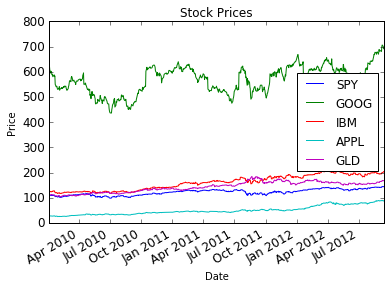

SPY     121.711206
GOOG    568.941941
IBM     159.669735
APPL     49.471732
GLD     142.603279
dtype: float64
SPY     123.305000
GOOG    578.845000
IBM     161.425000
APPL     45.382593
GLD     146.440000
dtype: float64
SPY     11.626556
GOOG    54.068129
IBM     28.731772
APPL    16.859279
GLD     20.562938
dtype: float64
SPY      82763.620000
GOOG    386880.520000
IBM     108575.420000
APPL     33640.778025
GLD      96970.230000
dtype: float64


In [95]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def symbol_to_path(symbol, base_dir="../ML4TData/data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    df = pd.DataFrame(index = dates)
    
    if "SPY" not in symbols:
        symbols.insert(0, "SPY")
    
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),
                             index_col = "Date",
                             parse_dates = True,
                             usecols = ["Date", "Adj Close"],
                             na_values = ["nan"])
        
        df_temp = df_temp.rename(columns = {"Adj Close":symbol})
        
        df = df.join(df_temp)
        if symbol == "SPY":
            df = df.dropna(subset=["SPY"])
            
    return df

def plot_data(df, title="Stock Prices"):
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
    
def normalize_data(df):
    return df / df.idx[0, :]

def run():
    dates = pd.date_range("2010-01-01", "2012-12-31")
    symbols = ["SPY", "GOOG", "IBM", "APPL", "GLD"]
    df = get_data(symbols, dates)
    plot_data(df)
    
    #compute global statistics for each stock
    print df.mean()
    print df.median()
    print df.std()
    print df.sum()
    
if __name__ == "__main__":
    run()

#### computing rolling statistics

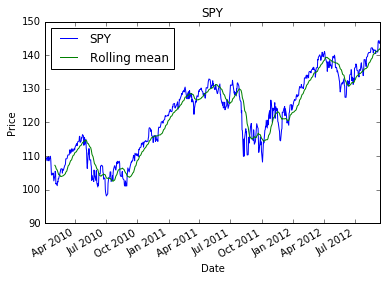

In [96]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def symbol_to_path(symbol, base_dir="../ML4TData/data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    df = pd.DataFrame(index = dates)
    
    if "SPY" not in symbols:
        symbols.insert(0, "SPY")
    
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),
                             index_col = "Date",
                             parse_dates = True,
                             usecols = ["Date", "Adj Close"],
                             na_values = ["nan"])
        
        df_temp = df_temp.rename(columns = {"Adj Close":symbol})
        
        df = df.join(df_temp)
        if symbol == "SPY":
            df = df.dropna(subset=["SPY"])
            
    return df


def run():
    dates = pd.date_range("2010-01-01", "2012-12-31")
    symbols = ["SPY", "GOOG", "IBM", "APPL", "GLD"]
    df = get_data(symbols, dates)
    
    ax = df["SPY"].plot(title="SPY", label="SPY")
    
    #compute rolling mean using a 20-day window
    rm_SPY = pd.Series.rolling(df["SPY"],window=20, center=False).mean()
    rm_SPY.plot(label="Rolling mean", ax=ax)
    
    
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc="upper left")
    plt.show()
    
    
if __name__ == "__main__":
    run()

#### Calculate Bollinger Band

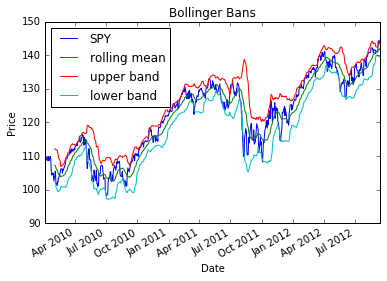

In [117]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def symbol_to_path(symbol, base_dir="../ML4TData/data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    df = pd.DataFrame(index = dates)
    
    if "SPY" not in symbols:
        symbols.insert(0, "SPY")
    
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),
                             index_col = "Date",
                             parse_dates = True,
                             usecols = ["Date", "Adj Close"],
                             na_values = ["nan"])
        
        df_temp = df_temp.rename(columns = {"Adj Close":symbol})
        
        df = df.join(df_temp)
        if symbol == "SPY":
            df = df.dropna(subset=["SPY"])
            
    return df

def get_rolling_mean(values, window, center=False):
    return pd.Series.rolling(values, window=window, center=center).mean()

def get_rolling_std(values, window, center=False):
    return pd.Series.rolling(values, window=window, center=center).std()

def get_bollinger_bands(rm, rstd):
    upper_band = rm + 2*rstd
    lower_band = rm - 2*rstd
    return upper_band, lower_band


def run():
    dates = pd.date_range("2010-01-01", "2012-12-31")
    symbols = ["SPY", "GOOG", "IBM", "APPL", "GLD"]
    df = get_data(symbols, dates)

    #compute Bollinger Bands
    #1. Compute rolling mean:
    rm_SPY = get_rolling_mean(df["SPY"], window=20)
    
    #2. compute rolling std
    rstd_SPY = get_rolling_std(df["SPY"], window=20)
    
    #3. compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    #Plot raw SPY values, rolling means and Bollinger Bands
    ax = df["SPY"].plot(title="Bollinger Bans", label="SPY")
    rm_SPY.plot(label="rolling mean", ax=ax)
    upper_band.plot(label="upper band", ax=ax)
    lower_band.plot(label="lower band", ax=ax)
    
    #add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc="upper left")
    plt.show()
    
    
if __name__ == "__main__":
    run()

#### compute daily return  
daily_return[t] = (price[t] / price[t-1]) - 1

#### cumulative return  
cum_return[t] = (price[t] / price[0]) - 1

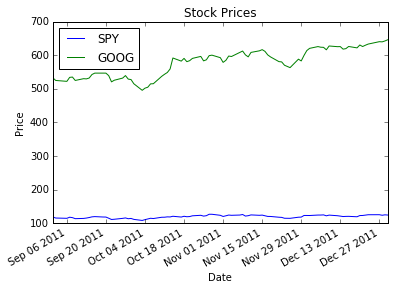

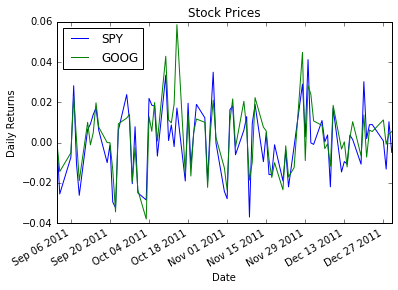

In [116]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def symbol_to_path(symbol, base_dir="../ML4TData/data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    df = pd.DataFrame(index = dates)
    
    if "SPY" not in symbols:
        symbols.insert(0, "SPY")
    
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),
                             index_col = "Date",
                             parse_dates = True,
                             usecols = ["Date", "Adj Close"],
                             na_values = ["nan"])
        
        df_temp = df_temp.rename(columns = {"Adj Close":symbol})
        
        df = df.join(df_temp)
        if symbol == "SPY":
            df = df.dropna(subset=["SPY"])
            
    return df

def compute_daily_returns(df):
    ans_df = df.copy()
    ans_df[1:] = (df[1:]/df[:-1].values) - 1
    ans_df[:1] = 0
    return ans_df


def run():
    dates = pd.date_range("2011-09-01", "2011-12-31")
    symbols = ["SPY", "GOOG"]
    df = get_data(symbols, dates)
    
    daily_returns_df = compute_daily_returns(df)
    
    ax1 = df.plot(title="Stock Prices")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Price")
    
    ax2 = daily_returns_df.plot(title="Stock Prices")
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Daily Returns")
    plt.show()
    
    
if __name__ == "__main__":
    run()

### 1.5 Incomplete data

#### fill missing values
**Priority:**  
1. fill forward
2. fill backward

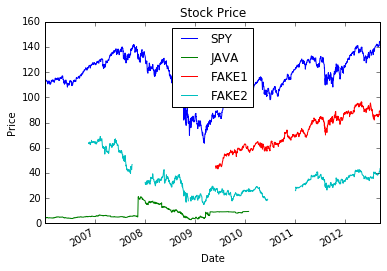

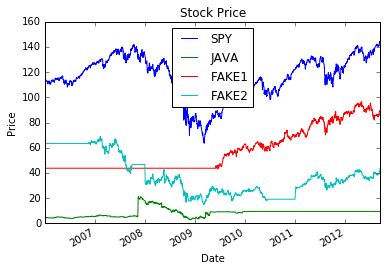

In [121]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="../ML4TData/data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    
    if "SPY" not in symbols:
        symbols.insert(0, "SPY")
    
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),
                             index_col = "Date",
                             parse_dates = True,
                             usecols = ["Date", "Adj Close"],
                             na_values = ["nan"])
        
        df_temp = df_temp.rename(columns={"Adj Close":symbol})
        
        df = df.join(df_temp)
        
        if symbol == "SPY":
            df = df.dropna(subset=["SPY"])
        
    return df

def plot_data(df, title="Stock Price"):
    ax = df.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

def fill_missing_values(df):
    df.fillna(method="ffill", inplace=True)
    df.fillna(method="bfill", inplace=True)

def run():
    dates = pd.date_range("2005-12-31", "2014-12-07")
    symbols = ["JAVA", "FAKE1", "FAKE2"]
    df = get_data(symbols, dates)
    
    plot_data(df)
    fill_missing_values(df)
    plot_data(df)
    
    
if __name__ == "__main__":
    run()

### 1.6 Histogram and Scatter Plot

#### plot histogram with statistics

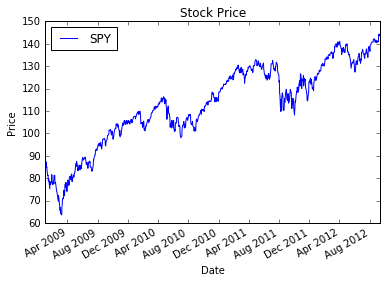

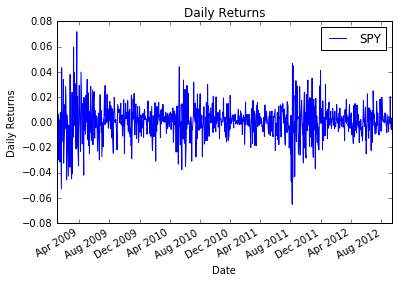

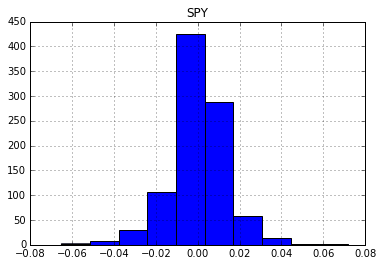

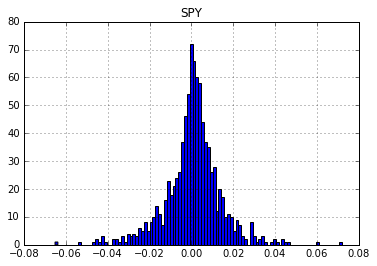

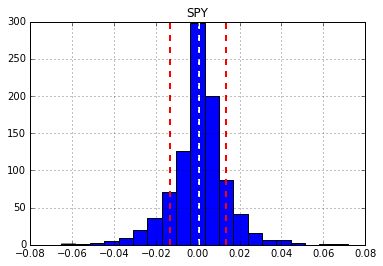

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def symbol_to_path(symbol, base_dir="../ML4TData/data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    df = pd.DataFrame(index = dates)
    
    if "SPY" not in symbols:
        symbols.insert(0, "SPY")
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),
                              index_col = "Date",
                              parse_dates = True,
                              usecols = ["Date", "Adj Close"],
                              na_values = ["nan"])
        
        df_temp = df_temp.rename(columns={"Adj Close":symbol})
        
        df = df.join(df_temp)
        
        if symbol == "SPY":
            df = df.dropna(subset=["SPY"])
    
    return df

def plot_data(df, title="Stock Price", ylabel="Price"):
    ax = df.plot(title = title)
    ax.set_xlabel("Date")
    ax.set_ylabel(ylabel)
    plt.show()
    
def compute_daily_returns(df):
    ans_df = df.copy()
    ans_df[1:] = (df[1:]/df[:-1].values) - 1
    ans_df.ix[0, :] = 0
    return ans_df
    
    
def run():
    #Read data
    dates = pd.date_range("2009-01-01", "2012-12-31")
    symbols = ["SPY"]
    df = get_data(symbols, dates)
    plot_data(df)
    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily Returns", ylabel="Daily Returns")
    
    # get mean and std
    mean = daily_returns["SPY"].mean()
    std = daily_returns["SPY"].std()
    
    # plot a histogram
    daily_returns.hist()
    daily_returns.hist(bins=100)
    daily_returns.hist(bins=20)
    plt.axvline(mean, color="w", linestyle="dashed", linewidth=2)
    plt.axvline(std, color="r", linestyle="dashed", linewidth=2)
    plt.axvline(-std, color="r", linestyle="dashed", linewidth=2)
    plt.show()
    
if __name__ == "__main__":
    run()

#### plot two histograms together

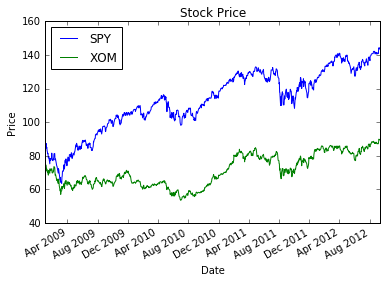

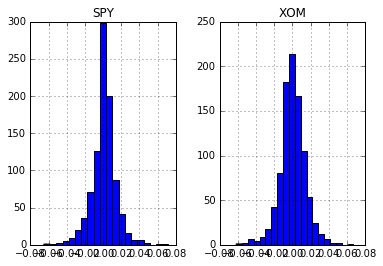

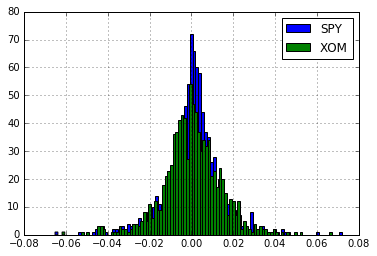

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def symbol_to_path(symbol, base_dir="../ML4TData/data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    df = pd.DataFrame(index = dates)
    
    if "SPY" not in symbols:
        symbols.insert(0, "SPY")
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),
                              index_col = "Date",
                              parse_dates = True,
                              usecols = ["Date", "Adj Close"],
                              na_values = ["nan"])
        
        df_temp = df_temp.rename(columns={"Adj Close":symbol})
        
        df = df.join(df_temp)
        
        if symbol == "SPY":
            df = df.dropna(subset=["SPY"])
    
    return df

def plot_data(df, title="Stock Price", ylabel="Price"):
    ax = df.plot(title = title)
    ax.set_xlabel("Date")
    ax.set_ylabel(ylabel)
    plt.show()
    
def compute_daily_returns(df):
    ans_df = df.copy()
    ans_df[1:] = (df[1:]/df[:-1].values) - 1
    ans_df.ix[0, :] = 0
    return ans_df
    
    
def run():
    #Read data
    dates = pd.date_range("2009-01-01", "2012-12-31")
    symbols = ["SPY", "XOM"]
    df = get_data(symbols, dates)
    plot_data(df)
    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
   
    # plot two histograms separately
    daily_returns.hist(bins=20)
    plt.show()
    
    # plot two histograms together
    daily_returns["SPY"].hist(bins=100, label="SPY")
    daily_returns["XOM"].hist(bins=100, label="XOM")
    plt.legend(loc = "upper right")
    plt.show()
    
if __name__ == "__main__":
    run()

#### Scatterplot

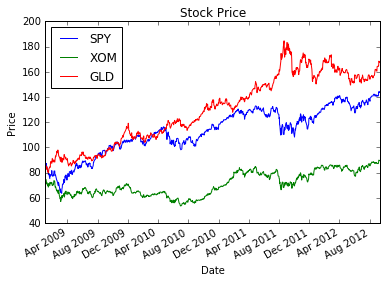

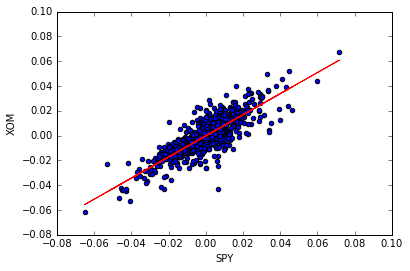

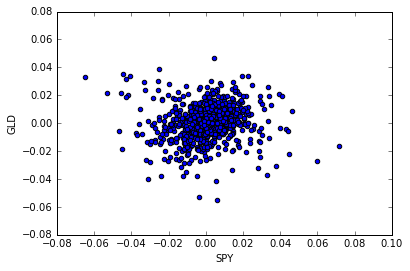

          SPY       XOM       GLD
SPY  1.000000  0.820241  0.067324
XOM  0.820241  1.000000  0.069687
GLD  0.067324  0.069687  1.000000


In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def symbol_to_path(symbol, base_dir="../ML4TData/data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    df = pd.DataFrame(index = dates)
    
    if "SPY" not in symbols:
        symbols.insert(0, "SPY")
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),
                              index_col = "Date",
                              parse_dates = True,
                              usecols = ["Date", "Adj Close"],
                              na_values = ["nan"])
        
        df_temp = df_temp.rename(columns={"Adj Close":symbol})
        
        df = df.join(df_temp)
        
        if symbol == "SPY":
            df = df.dropna(subset=["SPY"])
    
    return df

def plot_data(df, title="Stock Price", ylabel="Price"):
    ax = df.plot(title = title)
    ax.set_xlabel("Date")
    ax.set_ylabel(ylabel)
    plt.show()
    
def compute_daily_returns(df):
    ans_df = df.copy()
    ans_df[1:] = (df[1:]/df[:-1].values) - 1
    ans_df.ix[0, :] = 0
    return ans_df
    
    
def run():
    #Read data
    dates = pd.date_range("2009-01-01", "2012-12-31")
    symbols = ["SPY", "XOM", "GLD"]
    df = get_data(symbols, dates)
    plot_data(df)
    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
   
    # Scatter plot SPY vs XOM
    daily_returns.plot(kind="scatter", x="SPY", y="XOM")
    beta, alpha = np.polyfit(daily_returns["SPY"], daily_returns["XOM"], 1)
    plt.plot(daily_returns["SPY"], beta*daily_returns["SPY"]+alpha, "-", color="r")
    plt.show()
    
    # Scatter plot SPY vs GLD
    daily_returns.plot(kind="scatter", x="SPY", y="GLD")
    plt.show()
    
    # calculate correlation coefficient
    print daily_returns.corr(method = "pearson")
    
if __name__ == "__main__":
    run()

### 1.7 Sharpe Ratio and other Portfolio Statistics

#### Daily portfolio values

Given:   
start_val = 1000000  
start_date = 2009-01-01  
end_date = 2011-12-31  
symbols = ["SPY", "XOM", "GOOG", "GLD"]  
alloc = [0.4, 0.4, 0.1, 0.1]  
prices: a data frame, row index date, columns symbols
  
1. normed = prices/prices[0], df, same shape as prices
2. alloced = normed * alloc, df, same shape as normed
3. post_values = alloced * start_val, df, same shape as alloced
4. portfolio_val = pos_vals.sum(axis=1), df, dates*1 shape

#### Portfolio Statistics

portfolio_val => daily_rets, shape: dates*1  
notice daily_rets[0] always be 0, and not inclued when compute statistics, so:  
daily_rets = daiy_rets[1:]  
  
statistics:  
1. cum_ret = daily_rets[-1] / daily_rets[0]
2. avg_daily_ret = daily_rets.mean()
3. std_daily_ret = daily_rets.std()
4. sharpe.ratio


#### Shape Ratio(SR)

1. it is a risk adjusted return.  
2. all else being equal:
    - lower risk is better
    - higher return is better
3. SR also considers:
    - risk free rate of return (interest rate: 0% nowadays)  
  
higher risk means higher std in stock price.

formula:  
$$ 
SR=
\frac{E(R_{p} - R_{f})}{std(R_{p}-R_{f})}
=\frac{mean(dailyrets - dailyrf)}{std(dailyrets - dailyrf)}
=\frac{mean(dailyrets - dailyrf)}{std(dailyrets)}
$$  
where $R_{p}$ is protfolio return and $R_{f}$ is risk free rate of return.

What is dailyrf (risk free rate) in practice?  
- LIBOR
- 3 month treasure-bill
- 0%

SR can vary widely depending on how frequently you sample:
- SR is an annual measure
- $SR_{annualized} = K * SR  $
- where $K = \sqrt{\text{# sample per year}}$
- daily: $K=\sqrt{252}$
- weekly: $K=\sqrt{52}$
- monthly: $k=\sqrt{12}$

### 1.8 Optimizers: Building a paramerized model  

#### What is an optimizer? 

- Find minimum values of functions
- Build parameterized models based on data
- Refine allocations to stocks in portfolios

#### Minimier in Python

x = [ 3.], y = [ 2.75]
x = [ 3.], y = [ 2.75]
x = [ 3.00000001], y = [ 2.75000004]
x = [ 0.], y = [ 2.75]
x = [ 1.5], y = [ 0.5]
x = [ 1.5], y = [ 0.5]
x = [ 1.50000001], y = [ 0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: [ 0.5]
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
minima found at:
x = [ 1.5], y = [ 0.5]
x = [ 0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5], y = [ 1.5   1.31  1.14  0.99  0.86  0.75  0.66  0.59  0.54  0.51  0.5   0.51
  0.54  0.59  0.66  0.75  0.86  0.99  1.14  1.31  1.5 ]


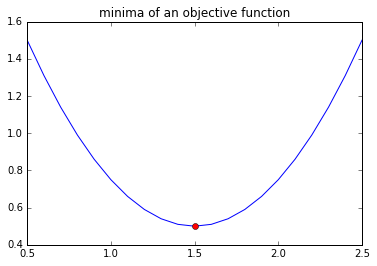

In [7]:
"""minimize an objective function, using Scipy."""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo
%matplotlib inline

def f(x):
    y = (x - 1.5)**2 + 0.5
    print "x = {}, y = {}".format(x, y)
    return y

def run():
    x_guess = 3
    min_result = spo.minimize(f, x_guess, method="SLSQP",
                            options={"disp": True})
    print "minima found at:"
    print "x = {}, y = {}".format(min_result.x, min_result.fun)
    
    xplot = np.linspace(0.5, 2.5, 21)
    yplot = f(xplot)
    plt.plot(xplot, yplot)
    plt.plot(min_result.x, min_result.fun, "ro")
    plt.title("minima of an objective function")
    plt.show()
    
if __name__ == "__main__":
    run()

#### convex problems
- choose two points, draw a line
- convex if line is above graph

### 1.9 Optimizer: how to optimize a portfolio

#### Framing the problem:
1. provide a function to minimize: $f(x)$ where
    - x: allocations
    - $f(x) = -\text{sharpe ratio}$ 
2. provide an initial guess for x
3. call the optimizer

#### Ranges and Constraints:

1. Ranges: Limits on values, for x: 0-1
2. Constraints: properties of x that must be True
    - e.g. $\sum_{i} |x_{i}| = 1$